In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
pd.options.mode.chained_assignment = None

from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
#import warnings
#warnings.filterwarnings("ignore")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [210]:
#Загрузим DS формата csv

In [211]:
df = pd.read_csv(r"C:\Уник\МО\Lab1\Highest Holywood Grossing Movies.csv")

In [212]:
df

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [213]:
#Напишем функциб для определения кол-ва пропусков

In [214]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [215]:
draw_missing(df).round(1)


,Total,Percent
License,174,19.0
Release Date,118,12.9
Unnamed: 0,0,0.0
Title,0,0.0
Movie Info,0,0.0
Distributor,0,0.0
Domestic Sales (in $),0,0.0
International Sales (in $),0,0.0
World Sales (in $),0,0.0
Genre,0,0.0


In [216]:
df.shape

(918, 11)

In [217]:
#Кол-во пропусков оказалось незначительным и не повлияет на общий анализ, поэтому их можно удалить

In [218]:
data_new_1 = df.dropna (axis=1, how='any')
(df.shape, data_new_1.shape)

((918, 11), (918, 9))

In [219]:
# Удаление строк, содержащих пустые значения
data_new_2 = df.dropna(axis=0, how='any')
(df.shape, data_new_2.shape)

((918, 11), (744, 11))

In [220]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = df.fillna(0)
data_new_3.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,0,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,0
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,0,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,0


In [221]:
draw_missing(df).round(1)


,Total,Percent
License,174,19.0
Release Date,118,12.9
Unnamed: 0,0,0.0
Title,0,0.0
Movie Info,0,0.0
Distributor,0,0.0
Domestic Sales (in $),0,0.0
International Sales (in $),0,0.0
World Sales (in $),0,0.0
Genre,0,0.0


In [222]:
#Посчитаем кол-во строк:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 918


In [223]:
# Список колонок
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [224]:
# Список колонок с типами данных
df.dtypes


Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [225]:
df

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [226]:
df.describe()


,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,918.000000,9.180000e+02,9.180000e+02,9.180000e+02
mean,458.500000,1.677469e+08,2.301434e+08,3.968668e+08
std,265.148072,1.040360e+08,2.176011e+08,3.082629e+08
min,0.000000,8.036084e+07,2.600000e+02,8.160000e+07
25%,229.250000,1.016071e+08,8.845620e+07,2.005564e+08
50%,458.500000,1.321351e+08,1.638819e+08,3.019416e+08
75%,687.750000,1.913905e+08,2.885577e+08,4.750718e+08
max,917.000000,9.366622e+08,2.086739e+09,2.847246e+09


In [227]:
# Определим уникальные значения для целевого признака
df['World Sales (in $)'].unique()


array([2069521700, 2797501328, 2847246203, 1347597973, 2048359754,
       1544455963, 2201647264, 1670516444, 1518815515, 1332698830,
       1243089244, 1662899439, 1005973645, 1056057720, 1074149279,
       1273576220, 1028570942, 1450026933, 1027082707,  775398007,
       1402809540, 1081142612,  928760770,  792910554, 1073394593,
       1128462972,  865011746, 1066179747, 1063611805, 1310466296,
       1066970811,  822824522, 1214811252, 1153337496,  694394724,
        825025036,  962542945, 1033928303,  836303693, 1281508100,
       1131927996,  863756051, 1342321665,  940352645,  868390560,
       1146030912,  788976453,  612054506,  875458631,  970766005,
        966554929,  782836791,  858848019, 1050693953, 1515341399,
       1123794079,  547426372,  947495095, 1024121104,  755356711,
        894983373, 1159444662, 1074419384, 1148485886,  880166924,
       1025468216,  773350147,  678226133,  873637528,  701796444,
        746846894,  785896609,  813367380,  800059707,  709709

C:\Users\Daniil\AppData\Local\Temp\ipykernel_1476\2199567354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['World Sales (in $)'])


<Axes: xlabel='World Sales (in $)', ylabel='Density'>

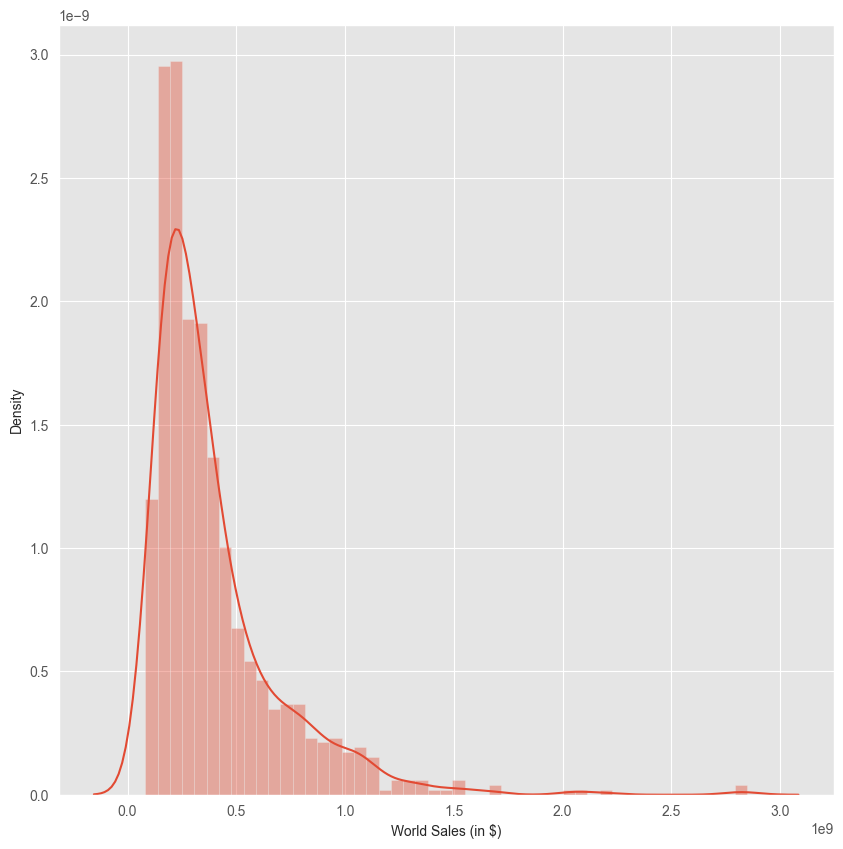

In [228]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['World Sales (in $)'])

<Axes: xlabel='World Sales (in $)', ylabel='Distributor'>

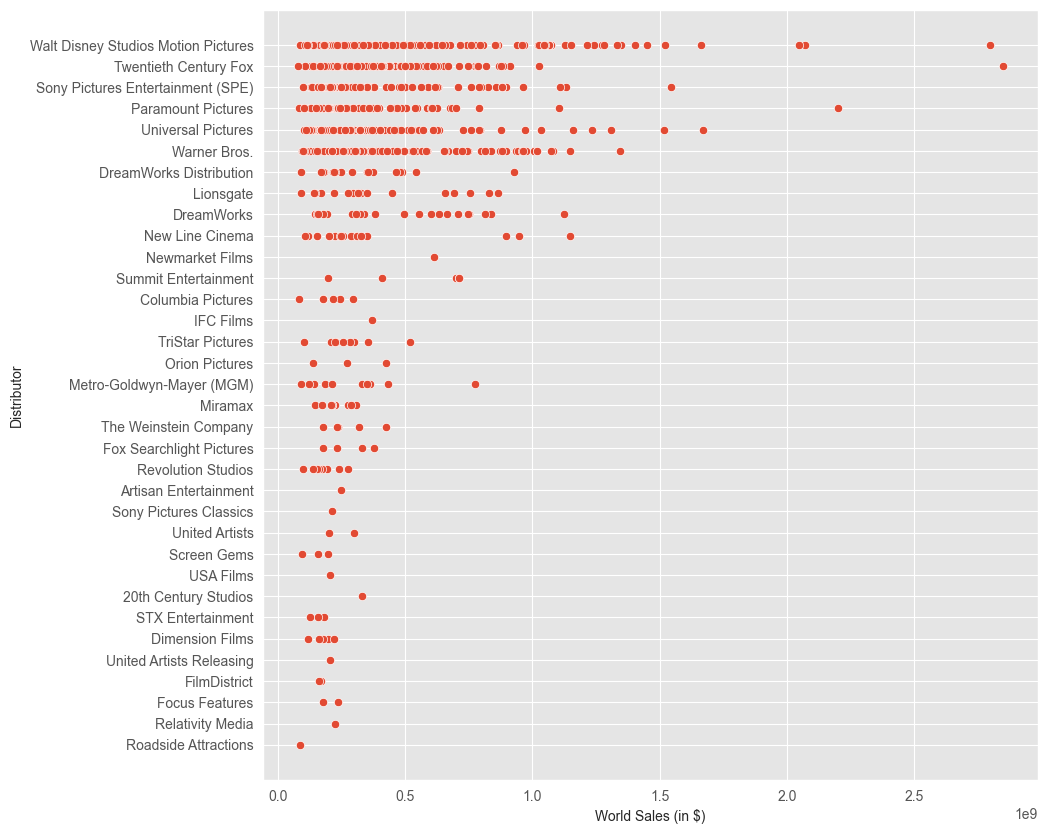

In [229]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='World Sales (in $)', y='Distributor', data=df)

<Axes: xlabel='World Sales (in $)', ylabel='Distributor'>

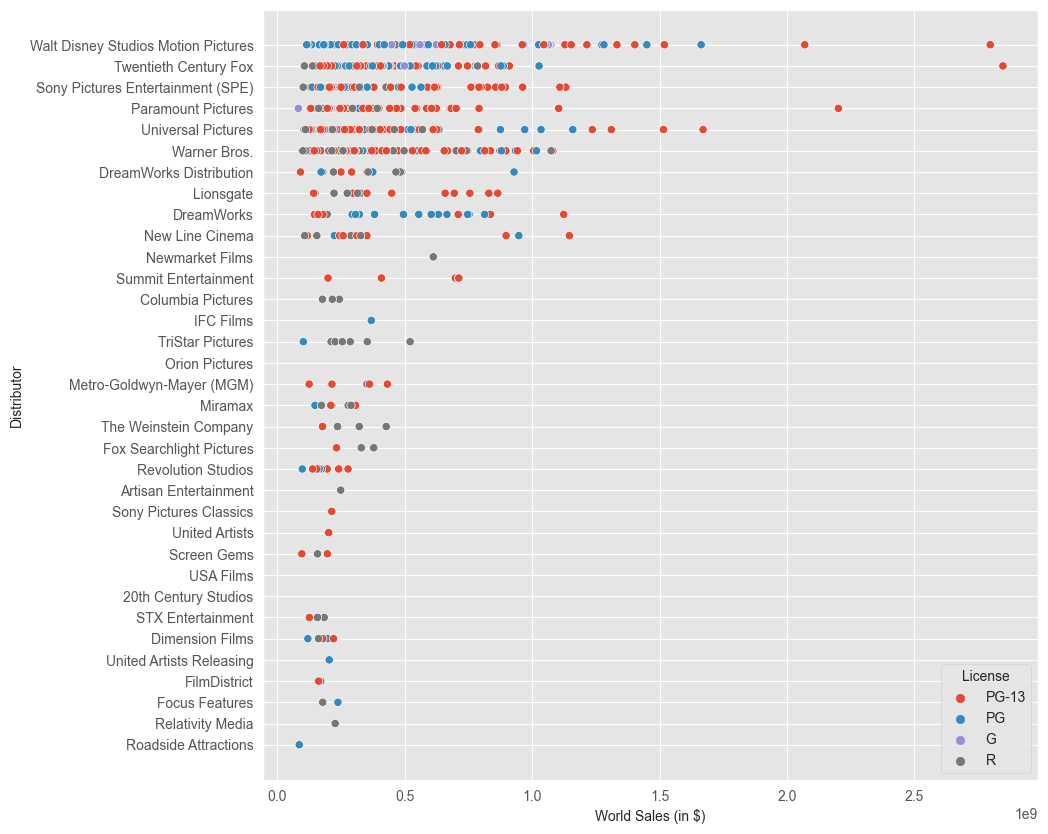

In [230]:
ig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='World Sales (in $)', y='Distributor', data=df, hue='License')

In [231]:
df = df.rename (columns= {'World Sales (in $)': 'sales'})

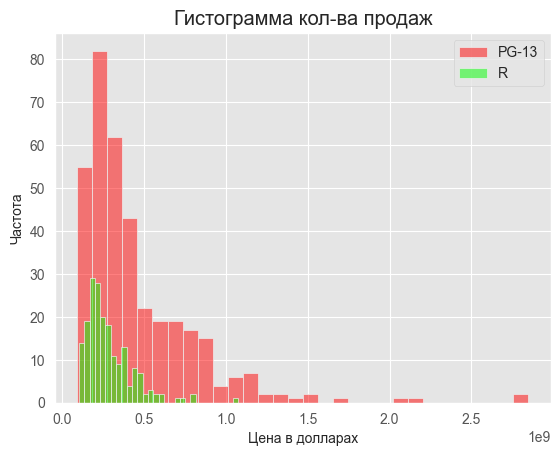

In [232]:
import matplotlib.pyplot as plt
m = plt.hist(df[df["License"] == "PG-13"].sales,bins=30,fc = (1,0,0,0.5),label = "PG-13")
b = plt.hist(df[df["License"] == "R"].sales,bins=30,fc = (0,1,0,0.5),label = "R")
plt.legend()
plt.xlabel("Цена в долларах")
plt.ylabel("Частота")
plt.title("Гистограмма кол-ва продаж")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]


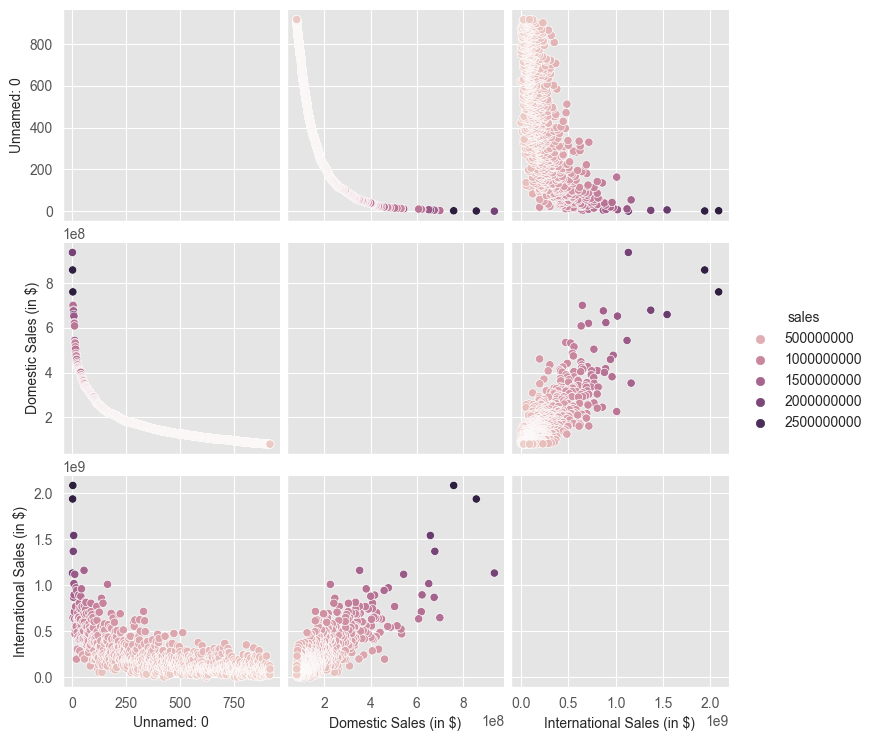

In [233]:
sns.pairplot(df, hue="sales")

<Axes: xlabel='sales'>

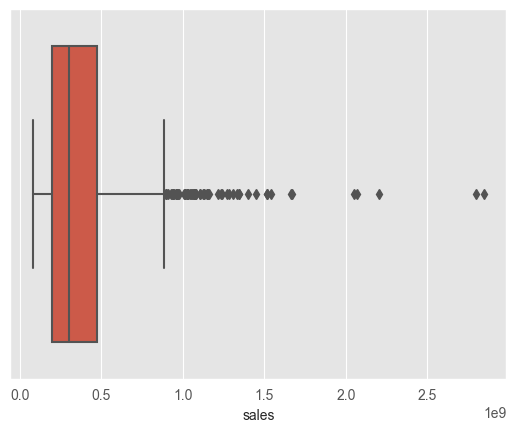

In [234]:
sns.boxplot(x=df['sales'])

<Axes: xlabel='sales', ylabel='Distributor'>

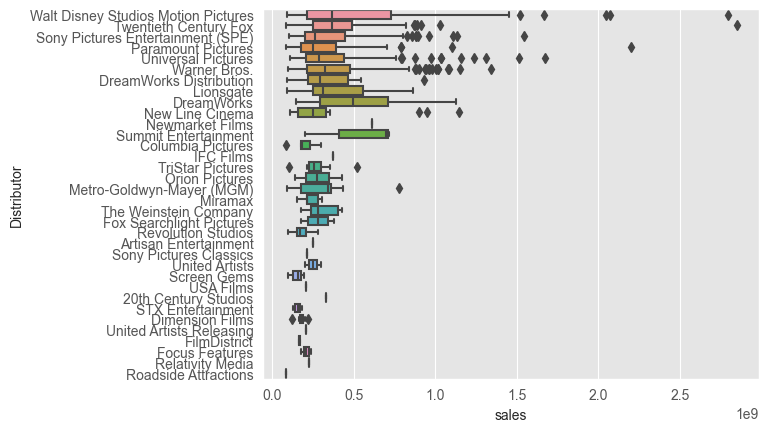

In [235]:
sns.boxplot(x='sales', y='Distributor', data=df)

<Axes: xlabel='sales'>

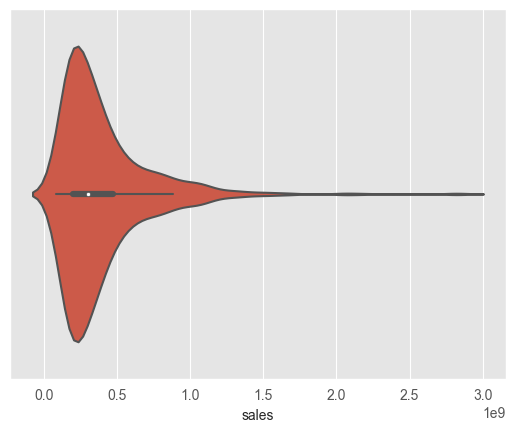

In [236]:
sns.violinplot(x=df['sales'])

([0, 1, 2, 3],
 [Text(0, 0, 'PG-13'), Text(1, 0, 'PG'), Text(2, 0, 'G'), Text(3, 0, 'R')])

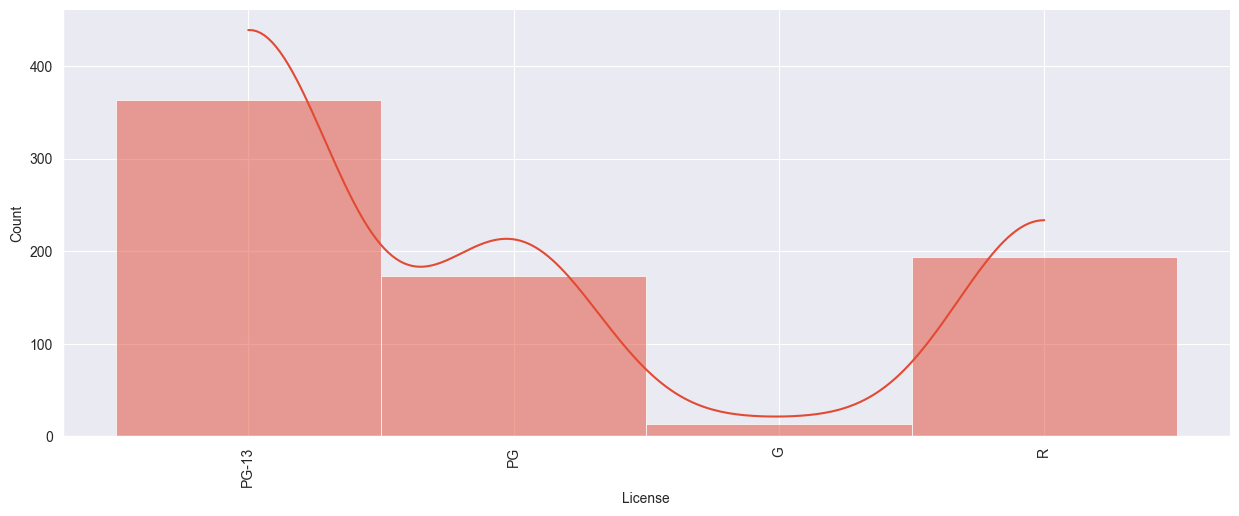

In [237]:
sns.set_style('darkgrid')

sns.displot(x='License',
            bins = 20,
            kde=True,
            aspect=2.5,
            data=df)
plt.xticks(rotation=90)

C:\Users\Daniil\AppData\Local\Temp\ipykernel_1476\4158495981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.3f')


<Axes: >

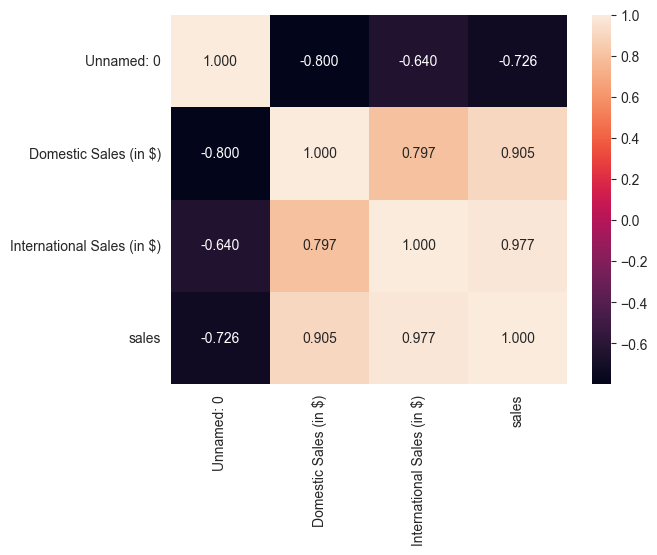

In [238]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.3f')

In [239]:
df.dtypes

Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
sales                          int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [240]:
df.isnull().sum()

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
sales                           0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [289]:
num_cols = []
for col in df.columns:
    # Количество пустых значений
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [242]:
# Фильтр по колонкам с пропущенными значениями
data_num = df[num_cols]
data_num
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [243]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in df.columns:
    # Количество пустых значений
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Release Date. Тип данных object. Количество пустых значений 118, 12.85%.
Колонка License. Тип данных object. Количество пустых значений 174, 18.95%.


In [244]:
cat_temp_data = df[['Release Date']]
cat_temp_data.head()

,Release Date
0,"December 16, 2015"
1,"April 24, 2019"
2,"December 16, 2009"
3,NaN
4,NaN


In [245]:
cat_temp_data['Release Date'].unique()

array(['December 16, 2015', 'April 24, 2019', 'December 16, 2009', nan,
       'December 19, 1997', 'June 10, 2015', 'April 25, 2012',
       'December 13, 2017', 'July 11, 2019', 'July 16, 2008',
       'December 14, 2016', 'December 18, 2019', 'March 16, 2017',
       'November 20, 2019', 'May 19, 1999', 'May 25, 1977',
       'April 22, 2015', 'July 19, 2012', 'May 19, 2004', 'June 11, 1982',
       'June 20, 2019', 'March 6, 2019', 'November 15, 2013',
       'July 6, 2006', 'June 15, 1994', 'June 6, 2018', 'June 16, 2010',
       'May 30, 2017', 'April 24, 2013', 'April 27, 2016',
       'March 8, 2012', 'May 3, 2002', 'December 20, 2017',
       'June 11, 1993', 'June 19, 2009', 'November 22, 2013',
       'June 28, 2019', 'April 25, 2017', 'May 30, 2003', 'May 18, 2005',
       'December 17, 2003', 'June 30, 2004', 'February 25, 2004',
       'June 24, 2016', 'June 20, 2013', 'April 7, 2016',
       'February 9, 2016', 'May 22, 2019', 'April 1, 2015',
       'June 29, 2011', 'De

In [246]:
cat_temp_data[cat_temp_data['Release Date'].isnull()].shape

(118, 1)

In [247]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['December 16, 2015'],
       ['April 24, 2019'],
       ['December 16, 2009'],
       ['March 20, 2014'],
       ['March 20, 2014'],
       ['March 20, 2014'],
       ['December 19, 1997'],
       ['June 10, 2015'],
       ['April 25, 2012'],
       ['December 13, 2017'],
       ['March 20, 2014'],
       ['July 11, 2019'],
       ['July 16, 2008'],
       ['December 14, 2016'],
       ['December 18, 2019'],
       ['March 16, 2017'],
       ['March 20, 2014'],
       ['November 20, 2019'],
       ['May 19, 1999'],
       ['May 25, 1977'],
       ['April 22, 2015'],
       ['July 19, 2012'],
       ['May 19, 2004'],
       ['June 11, 1982'],
       ['June 20, 2019'],
       ['March 6, 2019'],
       ['November 15, 2013'],
       ['July 6, 2006'],
       ['June 15, 1994'],
       ['June 6, 2018'],
       ['June 16, 2010'],
       ['May 30, 2017'],
       ['April 24, 2013'],
       ['April 27, 2016'],
       ['March 8, 2012'],
       ['May 3, 2002'],
       ['December 20, 2017'],

In [248]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['April 1, 2015', 'April 10, 2013', 'April 11, 2003',
       'April 11, 2018', 'April 12, 2006', 'April 12, 2013',
       'April 12, 2017', 'April 16, 2014', 'April 17, 2014',
       'April 18, 2002', 'April 19, 2002', 'April 2, 2009',
       'April 20, 2011', 'April 20, 2012', 'April 21, 1995',
       'April 21, 2011', 'April 22, 2015', 'April 24, 2013',
       'April 24, 2019', 'April 25, 2012', 'April 25, 2017',
       'April 27, 2016', 'April 28, 2010', 'April 29, 2009',
       'April 3, 2019', 'April 30, 1999', 'April 30, 2003',
       'April 30, 2004', 'April 30, 2008', 'April 4, 2011',
       'April 4, 2018', 'April 7, 2016', 'April 8, 2010', 'April 9, 2015',
       'August 1, 2003', 'August 1, 2018', 'August 10, 2001',
       'August 10, 2011', 'August 11, 2004', 'August 11, 2016',
       'August 12, 2010', 'August 13, 2003', 'August 13, 2008',
       'August 13, 2009', 'August 13, 2010', 'August 13, 2014',
       'August 14, 2003', 'August 14, 2015', 'August 14, 2019',
 

In [249]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['December 16, 2015'],
       ['April 24, 2019'],
       ['December 16, 2009'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['December 19, 1997'],
       ['June 10, 2015'],
       ['April 25, 2012'],
       ['December 13, 2017'],
       ['NA'],
       ['July 11, 2019'],
       ['July 16, 2008'],
       ['December 14, 2016'],
       ['December 18, 2019'],
       ['March 16, 2017'],
       ['NA'],
       ['November 20, 2019'],
       ['May 19, 1999'],
       ['May 25, 1977'],
       ['April 22, 2015'],
       ['July 19, 2012'],
       ['May 19, 2004'],
       ['June 11, 1982'],
       ['June 20, 2019'],
       ['March 6, 2019'],
       ['November 15, 2013'],
       ['July 6, 2006'],
       ['June 15, 1994'],
       ['June 6, 2018'],
       ['June 16, 2010'],
       ['May 30, 2017'],
       ['April 24, 2013'],
       ['April 27, 2016'],
       ['March 8, 2012'],
       ['May 3, 2002'],
       ['December 20, 2017'],
       ['June 11, 1993'],
       ['June 19, 2009'],
       

In [250]:
np.unique(data_imp3)

array(['April 1, 2015', 'April 10, 2013', 'April 11, 2003',
       'April 11, 2018', 'April 12, 2006', 'April 12, 2013',
       'April 12, 2017', 'April 16, 2014', 'April 17, 2014',
       'April 18, 2002', 'April 19, 2002', 'April 2, 2009',
       'April 20, 2011', 'April 20, 2012', 'April 21, 1995',
       'April 21, 2011', 'April 22, 2015', 'April 24, 2013',
       'April 24, 2019', 'April 25, 2012', 'April 25, 2017',
       'April 27, 2016', 'April 28, 2010', 'April 29, 2009',
       'April 3, 2019', 'April 30, 1999', 'April 30, 2003',
       'April 30, 2004', 'April 30, 2008', 'April 4, 2011',
       'April 4, 2018', 'April 7, 2016', 'April 8, 2010', 'April 9, 2015',
       'August 1, 2003', 'August 1, 2018', 'August 10, 2001',
       'August 10, 2011', 'August 11, 2004', 'August 11, 2016',
       'August 12, 2010', 'August 13, 2003', 'August 13, 2008',
       'August 13, 2009', 'August 13, 2010', 'August 13, 2014',
       'August 14, 2003', 'August 14, 2015', 'August 14, 2019',
 

In [251]:
data_imp3[data_imp3=='NA'].size

118

In [252]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,"December 16, 2015"
1,"April 24, 2019"
2,"December 16, 2009"
3,"March 20, 2014"
4,"March 20, 2014"
...,...
913,"June 25, 2004"
914,"December 21, 2001"
915,"August 13, 2010"
916,"October 17, 2003"


In [253]:
from sklearn.preprocessing import LabelEncoder
cat_enc['c1'].unique()

array(['December 16, 2015', 'April 24, 2019', 'December 16, 2009',
       'March 20, 2014', 'December 19, 1997', 'June 10, 2015',
       'April 25, 2012', 'December 13, 2017', 'July 11, 2019',
       'July 16, 2008', 'December 14, 2016', 'December 18, 2019',
       'March 16, 2017', 'November 20, 2019', 'May 19, 1999',
       'May 25, 1977', 'April 22, 2015', 'July 19, 2012', 'May 19, 2004',
       'June 11, 1982', 'June 20, 2019', 'March 6, 2019',
       'November 15, 2013', 'July 6, 2006', 'June 15, 1994',
       'June 6, 2018', 'June 16, 2010', 'May 30, 2017', 'April 24, 2013',
       'April 27, 2016', 'March 8, 2012', 'May 3, 2002',
       'December 20, 2017', 'June 11, 1993', 'June 19, 2009',
       'November 22, 2013', 'June 28, 2019', 'April 25, 2017',
       'May 30, 2003', 'May 18, 2005', 'December 17, 2003',
       'June 30, 2004', 'February 25, 2004', 'June 24, 2016',
       'June 20, 2013', 'April 7, 2016', 'February 9, 2016',
       'May 22, 2019', 'April 1, 2015', 'June 2

In [255]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [256]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем
# задачу классификации и каждое значение категории соответствует
# какому-либо классу целевого признака

le.classes_

array(['April 1, 2015', 'April 10, 2013', 'April 11, 2003',
       'April 11, 2018', 'April 12, 2006', 'April 12, 2013',
       'April 12, 2017', 'April 16, 2014', 'April 17, 2014',
       'April 18, 2002', 'April 19, 2002', 'April 2, 2009',
       'April 20, 2011', 'April 20, 2012', 'April 21, 1995',
       'April 21, 2011', 'April 22, 2015', 'April 24, 2013',
       'April 24, 2019', 'April 25, 2012', 'April 25, 2017',
       'April 27, 2016', 'April 28, 2010', 'April 29, 2009',
       'April 3, 2019', 'April 30, 1999', 'April 30, 2003',
       'April 30, 2004', 'April 30, 2008', 'April 4, 2011',
       'April 4, 2018', 'April 7, 2016', 'April 8, 2010', 'April 9, 2015',
       'August 1, 2003', 'August 1, 2018', 'August 10, 2001',
       'August 10, 2011', 'August 11, 2004', 'August 11, 2016',
       'August 12, 2010', 'August 13, 2003', 'August 13, 2008',
       'August 13, 2009', 'August 13, 2010', 'August 13, 2014',
       'August 14, 2003', 'August 14, 2015', 'August 14, 2019',
 

In [257]:
cat_enc_le

array([111,  18, 109, 462, 462, 462, 125, 335,  19,  94, 462, 248, 261,
        98, 123, 452, 462, 628, 524, 550,  16, 269, 526, 336, 375, 492,
       606, 320, 347, 431, 356, 573,  17,  21, 495, 568, 133, 337, 365,
       638, 412,  20, 462, 571, 520, 114, 420, 193, 391, 374,  31, 215,
       335, 538,   0, 415, 157, 119, 462, 620, 499,  33, 681, 462, 316,
       478, 313, 318, 468, 736,  61, 516, 518, 164, 408,  28, 608, 532,
       126, 687,  22, 514, 536, 552, 308, 327, 688, 462, 258, 422, 616,
       462,  68, 564, 531, 259, 244, 602, 169, 341, 621, 609, 607, 617,
       510, 610, 142, 427, 698, 658, 130, 462, 513, 345, 599, 409, 654,
       371, 614, 469, 462, 201, 579,  88, 627, 462, 555, 324, 385, 462,
       271, 575, 462, 340, 618, 395, 438, 435, 541, 500,  10, 565, 521,
       529, 519, 379, 491, 547, 413, 612, 533, 141, 462, 690, 540, 462,
       582, 733,  55, 273,  59, 443,  58,   6, 462, 399, 689, 293, 462,
       136, 641, 604, 416,  96, 250, 454, 517, 597,  88, 285, 69

In [258]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [259]:
# В этом примере видно, что перед кодированием
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['April 1, 2015', 'April 10, 2013', 'April 11, 2003',
       'April 11, 2018'], dtype=object)

In [263]:
from sklearn.preprocessing import OrdinalEncoder
data_oe = df[['License', 'Title', 'Distributor']]
data_oe.head()

,License,Title,Distributor
0,PG-13,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures
1,PG-13,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures
2,PG-13,Avatar (2009),Twentieth Century Fox
3,NaN,Black Panther (2018),Walt Disney Studios Motion Pictures
4,NaN,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures


In [264]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['PG-13', 'Star Wars: Episode VII - The Force Awakens (2015)',
        'Walt Disney Studios Motion Pictures'],
       ['PG-13', 'Avengers: Endgame (2019)',
        'Walt Disney Studios Motion Pictures'],
       ['PG-13', 'Avatar (2009)', 'Twentieth Century Fox'],
       ...,
       ['PG-13', 'Eat Pray Love (2010)',
        'Sony Pictures Entertainment (SPE)'],
       ['R', 'The Texas Chainsaw Massacre (2003)', 'New Line Cinema'],
       ['PG', 'Zookeeper (2011)', 'Sony Pictures Entertainment (SPE)']],
      dtype=object)

In [265]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[  3., 628.,  32.],
       [  3.,  68.,  32.],
       [  3.,  66.,  27.],
       ...,
       [  3., 202.,  23.],
       [  4., 820.,  13.],
       [  2., 915.,  23.]])

In [266]:
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4.])

In [267]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [268]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33.])

In [269]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['G', 'NA', 'PG', 'PG-13', 'R'], dtype=object),
 array(['10,000 BC (2008)', '1917 (2019)', '2 Fast 2 Furious (2003)',
        '2012 (2009)', '21 (2008)', '21 Jump Street (2012)',
        '22 Jump Street (2014)', '300 (2006)',
        '300: Rise of an Empire (2014)', '42 (2013)',
        '50 First Dates (2004)', '8 Mile (2002)',
        'A Beautiful Mind (2001)', "A Bug's Life (1998)",
        'A Christmas Carol (2009)', 'A Few Good Men (1992)',
        'A League of Their Own (1992)', 'A Quiet Place (2018)',
        'A Quiet Place Part II (2020)',
        'A Series of Unfortunate Events (2004)', 'A Star Is Born (2018)',
        'A Time to Kill (1996)', 'A Wrinkle in Time (2018)',
        'Ace Ventura: When Nature Calls (1995)', 'Air Force One (1997)',
        'Aladdin (1992)', 'Aladdin (2019)', 'Alice in Wonderland (2010)',
        'Alien (1979)', 'Aliens (1986)', 'Alita: Battle Angel (2019)',
        'Along Came Polly (2004)', 'Alvin and the Chipmunks (2007)',
        'Alvin and

In [270]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['PG-13', 'Star Wars: Episode VII - The Force Awakens (2015)',
        'Walt Disney Studios Motion Pictures'],
       ['PG-13', 'Avengers: Endgame (2019)',
        'Walt Disney Studios Motion Pictures'],
       ['PG-13', 'Avatar (2009)', 'Twentieth Century Fox'],
       ...,
       ['PG-13', 'Eat Pray Love (2010)',
        'Sony Pictures Entertainment (SPE)'],
       ['R', 'The Texas Chainsaw Massacre (2003)', 'New Line Cinema'],
       ['PG', 'Zookeeper (2011)', 'Sony Pictures Entertainment (SPE)']],
      dtype=object)

In [260]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [261]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [262]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


In [271]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(918, 1)

In [272]:
cat_enc_ohe.shape

(918, 740)

In [273]:
cat_enc_ohe

<918x740 sparse matrix of type '<class 'numpy.float64'>'
	with 918 stored elements in Compressed Sparse Row format>

In [274]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [275]:
cat_enc.head(10)

,c1
0,"December 16, 2015"
1,"April 24, 2019"
2,"December 16, 2009"
3,"March 20, 2014"
4,"March 20, 2014"
5,"March 20, 2014"
6,"December 19, 1997"
7,"June 10, 2015"
8,"April 25, 2012"
9,"December 13, 2017"


In [276]:
pd.get_dummies(cat_enc).head()

,"c1_April 1, 2015","c1_April 10, 2013","c1_April 11, 2003","c1_April 11, 2018","c1_April 12, 2006","c1_April 12, 2013","c1_April 12, 2017","c1_April 16, 2014","c1_April 17, 2014","c1_April 18, 2002",...,"c1_September 28, 2016","c1_September 29, 2000","c1_September 29, 2006","c1_September 30, 2015","c1_September 4, 2019","c1_September 5, 2018","c1_September 6, 2017","c1_September 8, 2016","c1_September 9, 2009","c1_September 9, 2015"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,"Release Date_April 1, 2015","Release Date_April 10, 2013","Release Date_April 11, 2003","Release Date_April 11, 2018","Release Date_April 12, 2006","Release Date_April 12, 2013","Release Date_April 12, 2017","Release Date_April 16, 2014","Release Date_April 17, 2014","Release Date_April 18, 2002",...,"Release Date_September 29, 2000","Release Date_September 29, 2006","Release Date_September 30, 2015","Release Date_September 4, 2019","Release Date_September 5, 2018","Release Date_September 6, 2017","Release Date_September 8, 2016","Release Date_September 9, 2009","Release Date_September 9, 2015",Release Date_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [281]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [284]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['Sales (in $)']])

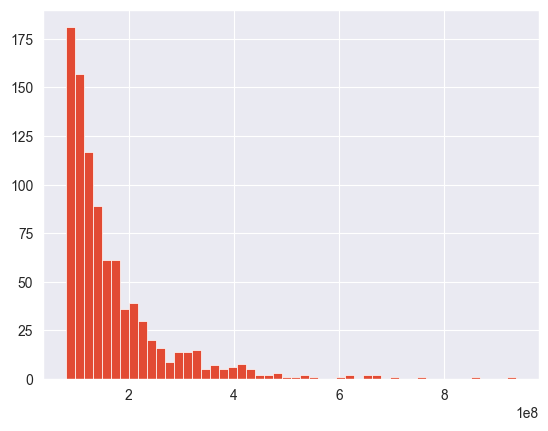

In [285]:
plt.hist(df['Sales (in $)'], 50)
plt.show()

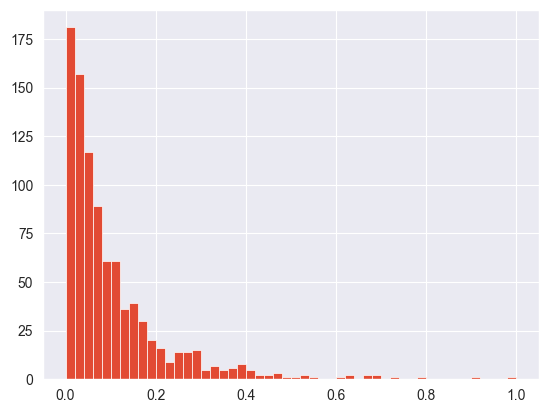

In [286]:
plt.hist(sc1_data, 50)
plt.show()

In [287]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['Sales (in $)']])

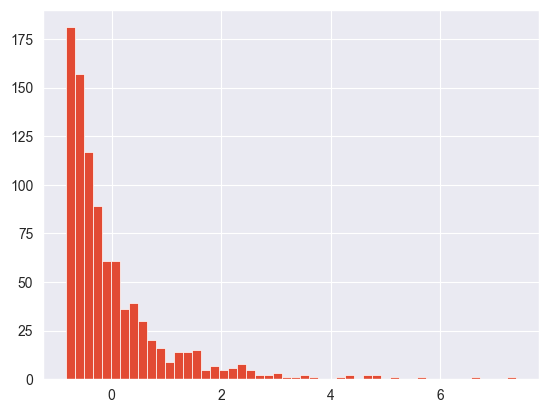

In [288]:
plt.hist(sc2_data, 50)
plt.show()